## 1 - Test avec RandomForest

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv(f"./Driving_Behavior_Dataset/sensor_raw.csv")

X = data.drop("Target(Class)", axis=1)
Y = data["Target(Class)"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

model = RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(X_train, Y_train)

Y_Pred = model.predict(X_test)

print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           1       0.69      0.50      0.58        50
           2       0.69      0.64      0.66        58
           3       0.62      0.81      0.70        70
           4       0.83      0.76      0.79        45

    accuracy                           0.69       223
   macro avg       0.71      0.68      0.68       223
weighted avg       0.70      0.69      0.68       223



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv")

X = data.drop("Target", axis=1)
Y = data["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

model = RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(X_train, Y_train)

Y_Pred = model.predict(X_test)

print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        44

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



Calcul en cours...


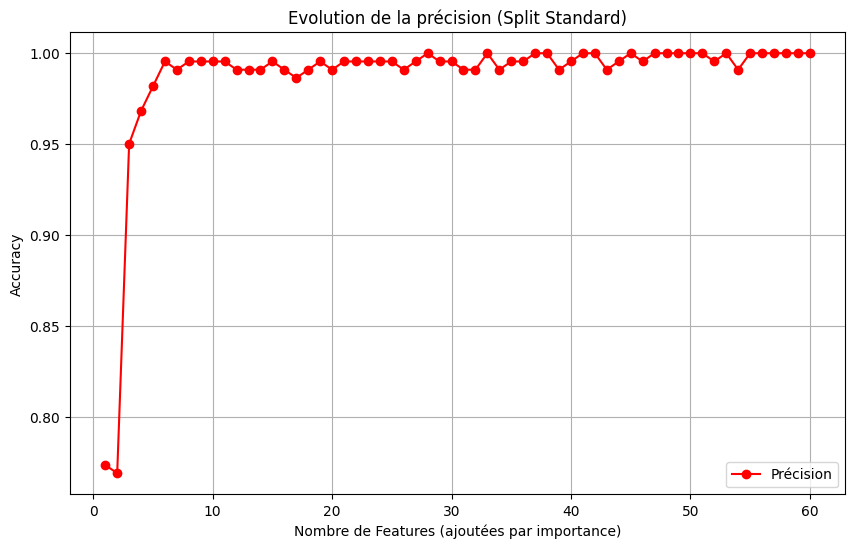

Top 5 des variables les plus influentes :
['GyroMeanZ', 'GyroSumZ', 'GyroMinZ', 'GyroStdZ', 'GyroMaxZ']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Chargement des données 
df = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv") 

# 2. Importation Importances 
model = RandomForestClassifier(n_estimators=200, random_state=42)
X = df.drop("Target", axis=1)
y = df["Target"]
model.fit(X, y)
importances = model.feature_importances_

# 3. Préparation des Features triées
feature_names = df.drop("Target", axis=1).columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# On trie du plus important au moins important
sorted_features = feat_imp_df.sort_values(by='Importance', ascending=False)['Feature'].tolist()

# 4. Split Classique 
X = df.drop("Target", axis=1)
y = df["Target"]

# On utilise le split standard avec shuffle (ce qui donne les 100%)
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. La Boucle d'Optimisation
accuracies = []
nums = []

print("Calcul en cours...")
for k in range(1, len(sorted_features) + 1):
    # On prend les k meilleures colonnes
    top_k_features = sorted_features[:k]
    
    # On réduit le train/test à ces colonnes
    X_train_k = X_train_full[top_k_features]
    X_test_k = X_test_full[top_k_features]
    
    # Entraînement rapide
    clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    clf.fit(X_train_k, y_train)
    
    # Score
    acc = accuracy_score(y_test, clf.predict(X_test_k))
    accuracies.append(acc)
    nums.append(k)

# 6. Graphique
plt.figure(figsize=(10, 6))
plt.plot(nums, accuracies, marker='o', color='red', label='Précision')
plt.title("Evolution de la précision (Split Standard)")
plt.xlabel("Nombre de Features (ajoutées par importance)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Affichage du top 5
print("Top 5 des variables les plus influentes :")
print(sorted_features[:5])

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv")

X = data[['GyroMeanZ', 'GyroSumZ', 'GyroMinZ', 'GyroStdZ', 'AccMaxY']]
Y = data["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

model = RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(X_train, Y_train)

Y_Pred = model.predict(X_test)

print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        57
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        44

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



## 2 - Test avec d'autres Models

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

data = pd.read_csv(f"./Driving_Behavior_Dataset/sensor_raw.csv")

X = data.drop("Target(Class)", axis=1)
Y = data["Target(Class)"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

models = {
    "SVM": SVC(kernel='rbf', C=1.0, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regression": LogisticRegression(max_iter=1000),
    "RNN": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500)
          }

for name, model in models.items() :
    model.fit(X_train, Y_train)

    Y_Pred = model.predict(X_test)

    print(name, classification_report(Y_test, Y_Pred))

SVM               precision    recall  f1-score   support

           1       0.46      0.12      0.19        50
           2       0.96      0.38      0.54        58
           3       0.47      0.70      0.56        70
           4       0.35      0.64      0.46        45

    accuracy                           0.48       223
   macro avg       0.56      0.46      0.44       223
weighted avg       0.57      0.48      0.45       223

KNN               precision    recall  f1-score   support

           1       0.40      0.48      0.44        50
           2       0.61      0.59      0.60        58
           3       0.53      0.57      0.55        70
           4       0.61      0.42      0.50        45

    accuracy                           0.52       223
   macro avg       0.54      0.51      0.52       223
weighted avg       0.54      0.52      0.53       223

Regression               precision    recall  f1-score   support

           1       0.34      0.28      0.31        50
  

/Users/ap/Library/Mobile Documents/com~apple~CloudDocs/Estaca/4A/SEMESTRE_2/IA/ProjetIA_Driver_Risk/.env/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

data = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv")

X = data.drop("Target", axis=1)
Y = data["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

models = {
    "SVM": SVC(kernel='rbf', C=1.0, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regression": LogisticRegression(max_iter=2000),
    "RNN": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500)
          }

for name, model in models.items() :
    model.fit(X_train, Y_train)

    Y_Pred = model.predict(X_test)

    print(name, classification_report(Y_test, Y_Pred))

SVM               precision    recall  f1-score   support

           1       0.76      0.84      0.80        50
           2       1.00      0.96      0.98        57
           3       1.00      0.84      0.91        70
           4       0.73      0.86      0.79        44

    accuracy                           0.88       221
   macro avg       0.87      0.88      0.87       221
weighted avg       0.89      0.88      0.88       221

KNN               precision    recall  f1-score   support

           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        57
           3       1.00      0.99      0.99        70
           4       0.98      1.00      0.99        44

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221

Regression               precision    recall  f1-score   support

           1       0.98      0.94      0.96        50
  

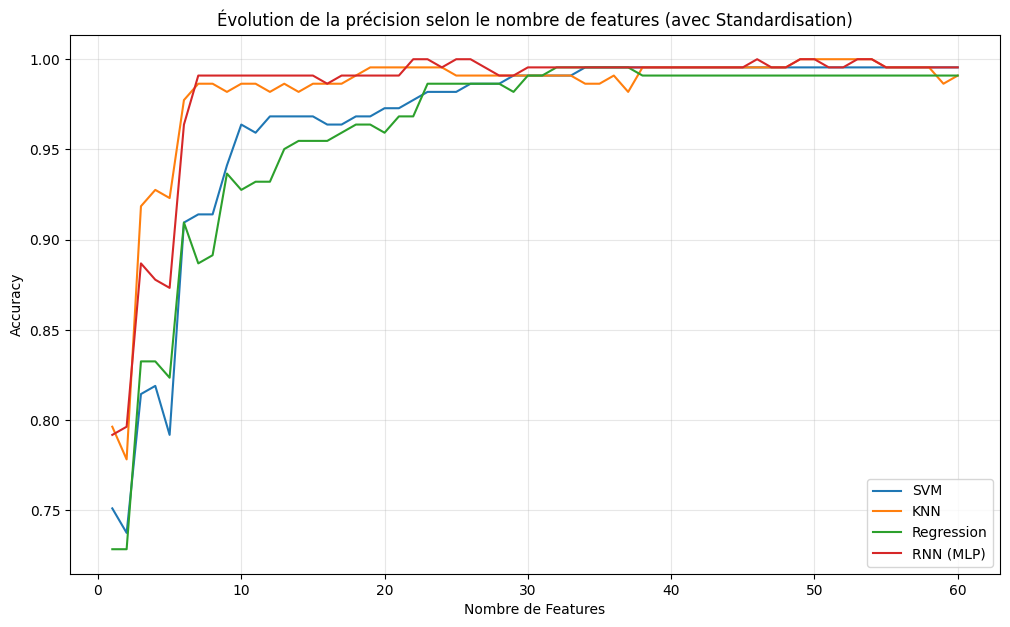

Top 5 des variables les plus influentes :
['GyroMeanZ', 'GyroSumZ', 'GyroMinZ', 'GyroStdZ', 'GyroMaxZ']


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # <--- Crucial

# 1. Chargement des données
df = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv") 

# 2. Importance des features (Random Forest n'a pas besoin de scaling)
X = df.drop("Target", axis=1)
y = df["Target"]
rf_selector = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_selector.fit(X, y)
sorted_features = pd.DataFrame({'F': X.columns, 'I': rf_selector.feature_importances_}) \
                    .sort_values(by='I', ascending=False)['F'].tolist()

# 3. Split
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Modèles
models = {
    "SVM": SVC(kernel='rbf', C=1.0, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regression": LogisticRegression(max_iter=1000),
    "RNN (MLP)": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=2000, random_state=42)
}

# 5. Boucle avec Scaling
plt.figure(figsize=(12, 7))

for model_name, clf in models.items():
    accuracies = []
    nums = []
    
    for k in range(1, len(sorted_features) + 1):
        top_k_features = sorted_features[:k]
        X_tr = X_train_full[top_k_features]
        X_te = X_test_full[top_k_features]
        
        # --- Étape de Scaling ---
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)
        
        clf.fit(X_tr_scaled, y_train)
        acc = accuracy_score(y_test, clf.predict(X_te_scaled))
        
        accuracies.append(acc)
        nums.append(k)
    
    plt.plot(nums, accuracies, label=model_name)

plt.title("Évolution de la précision selon le nombre de features (avec Standardisation)")
plt.xlabel("Nombre de Features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Affichage du top 5
print("Top 5 des variables les plus influentes :")
print(sorted_features[:5])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


# 1. Chargement et sélection des features
data = pd.read_csv(r"Driving_Behavior_Dataset/Features_By_Window_Size/sero_features_4.csv")

# Utilisation de la sélection spécifique
features = ['GyroMeanZ', 'GyroSumZ', 'GyroMinZ', 'GyroStdZ', 'AccMaxY']
X = data[features]
Y = data["Target"]

# 2. Split avec stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 3. Standardisation (Indispensable pour SVM, Regression et MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Définition du dictionnaire de modèles
models = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVC": SVC(kernel='linear', C=1.0, random_state=42),
    "Regression": LogisticRegression(max_iter=2000),
    "RNN (MLPC)": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000,  random_state=42)
}

# 5. Entraînement et Évaluation
for name, model in models.items():
    print(f"--- Évaluation : {name} ---")
    
    # Validation Croisée (K-Fold, cv=5)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5)
    
    # Entraînement final pour le rapport de classification
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    
    # Affichage des résultats
    print(f"CV Accuracy Moyenne : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nRapport de Classification (sur Test Set) :")
    print(classification_report(Y_test, Y_pred))
    print("-" * 50)

--- Évaluation : Random Forest Classifier ---
CV Accuracy Moyenne : 0.9841 (+/- 0.0231)

Rapport de Classification (sur Test Set) :
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        57
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        44

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

--------------------------------------------------
--- Évaluation : SVC ---
CV Accuracy Moyenne : 0.8842 (+/- 0.0579)

Rapport de Classification (sur Test Set) :
              precision    recall  f1-score   support

           1       0.78      0.92      0.84        50
           2       1.00      0.98      0.99        57
           3       1.00      0.86      0.92        70
           4       0.89      0.93      0.91        44
